In [ ]:
#Analysif of MD Trajectory using MDAnalysis

In [1]:
#import tools
# MDAnalysis tools
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align, pca
# To view the trajs on notebook
import nglview as nv

In [3]:
# Data processing
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)  #Suppress scientific notation

from sklearn.decomposition import PCA

In [4]:
# Plot & System tools
import matplotlib as mpl
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap, NoNorm, BoundaryNorm, CSS4_COLORS
import seaborn as sns

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

#Change working directory to current directory
import os
os.chdir(os.getcwd() )

In [5]:
%ls

 Volume in drive C is Windows 
 Volume Serial Number is 8C6A-6241

 Directory of C:\Users\Rajnish Kumar\Downloads

15-07-2022  12:51    <DIR>          .
15-07-2022  12:39    <DIR>          ..
15-07-2022  12:51    <DIR>          .ipynb_checkpoints
11-04-2021  11:45         1,672,087 0004T.pdf
01-04-2022  12:16           356,665 00397910801986192.pdf
11-09-2021  21:39             1,663 004aj.RIS
12-06-2022  16:17            73,327 01.jpeg
07-03-2021  14:33         5,900,012 014AR.pdf
12-06-2022  16:17           246,937 02.jpeg
12-06-2022  16:16           135,437 03.jpeg
11-09-2021  21:39             1,505 10.1007_s00044-011-9901-0-citation.ris
11-09-2021  21:39             1,491 10.1007_s00044-012-0006-1-citation.ris
11-09-2021  21:38             1,224 10.1007_s00044-012-0456-5-citation.ris
11-09-2021  21:38             1,839 10.1007_s00044-013-0690-5-citation.ris
11-09-2021  21:38             1,415 10.1007_s00044-013-0797-8-citation.ris
07-08-2021  18:38         2,104,174 10.1016@B978-0

In [7]:
u = mda.Universe("6saf.gro","md_center.xtc")
print (u)
print (u.atoms)

<Universe with 27465 atoms>
<AtomGroup [<Atom 1: N of type N of resname GLY, resid 13 and segid SYSTEM>, <Atom 2: H1 of type H of resname GLY, resid 13 and segid SYSTEM>, <Atom 3: H2 of type H of resname GLY, resid 13 and segid SYSTEM>, ..., <Atom 27463: HW2 of type H of resname SOL, resid 8761 and segid SYSTEM>, <Atom 27464: CL of type CL of resname CL, resid 8762 and segid SYSTEM>, <Atom 27465: CL of type CL of resname CL, resid 8763 and segid SYSTEM>]>


In [8]:
print('Atoms: ', u.atoms.n_atoms)
print('Residues: ', u.residues.n_residues)
print('Segments: ', u.segments.n_segments)

Atoms:  27465
Residues:  8623
Segments:  1


In [9]:
a = u.atoms[0:70000]
list (a.resids)

[13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 28,
 28,
 28,


In [18]:
list (u.atoms[20000:75000])

[<Atom 20001: HW1 of type H of resname SOL, resid 6274 and segid SYSTEM>,
 <Atom 20002: HW2 of type H of resname SOL, resid 6274 and segid SYSTEM>,
 <Atom 20003: OW of type O of resname SOL, resid 6275 and segid SYSTEM>,
 <Atom 20004: HW1 of type H of resname SOL, resid 6275 and segid SYSTEM>,
 <Atom 20005: HW2 of type H of resname SOL, resid 6275 and segid SYSTEM>,
 <Atom 20006: OW of type O of resname SOL, resid 6276 and segid SYSTEM>,
 <Atom 20007: HW1 of type H of resname SOL, resid 6276 and segid SYSTEM>,
 <Atom 20008: HW2 of type H of resname SOL, resid 6276 and segid SYSTEM>,
 <Atom 20009: OW of type O of resname SOL, resid 6277 and segid SYSTEM>,
 <Atom 20010: HW1 of type H of resname SOL, resid 6277 and segid SYSTEM>,
 <Atom 20011: HW2 of type H of resname SOL, resid 6277 and segid SYSTEM>,
 <Atom 20012: OW of type O of resname SOL, resid 6278 and segid SYSTEM>,
 <Atom 20013: HW1 of type H of resname SOL, resid 6278 and segid SYSTEM>,
 <Atom 20014: HW2 of type H of resname SOL

In [10]:
from MDAnalysis.analysis import align, rms
aligner = align.AlignTraj(u, u, select='name CA', in_memory=True).run()

In [11]:
#make protein, ligand and complex as independent entries
protein = u.atoms.select_atoms("protein")
all = u.atoms.select_atoms("resnum 1:8623")
print (protein)

<AtomGroup [<Atom 1: N of type N of resname GLY, resid 13 and segid SYSTEM>, <Atom 2: H1 of type H of resname GLY, resid 13 and segid SYSTEM>, <Atom 3: H2 of type H of resname GLY, resid 13 and segid SYSTEM>, ..., <Atom 1982: C of type C of resname GLU, resid 140 and segid SYSTEM>, <Atom 1983: O1 of type O of resname GLU, resid 140 and segid SYSTEM>, <Atom 1984: O2 of type O of resname GLU, resid 140 and segid SYSTEM>]>


In [76]:
# visualize trajectory in nglview

import nglview as nv
view = nv.show_mdanalysis(u)
view.camera = 'orthographic'
view.background = 'white'
view.layout.width='100%'
view.layout.height='100%'
#view.add_surface("protein")
view.player.parameters = dict(delay=10)
view.add_representation('licorice', selection='protein', color='blue')
view.add_representation('ball+stick', selection='water')
#view.add_representation('line', selection='water')
view.player.interpolate = True
view

NGLWidget(layout=Layout(height='100%', width='100%'), max_frame=1000)

In [16]:
import MDAnalysis.analysis.rms
import matplotlib.pyplot as plt
import MDAnalysis as mda
import pandas as pd
import numpy as np

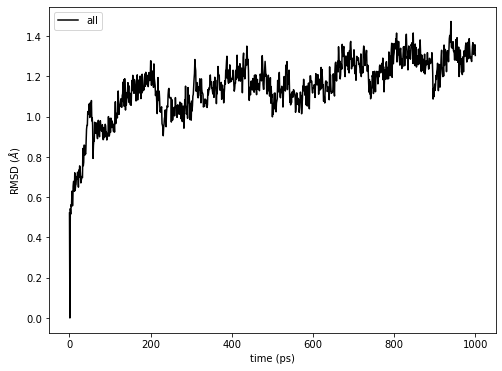

In [17]:
#Protein RMSD
R = MDAnalysis.analysis.rms.RMSD(protein, protein,
           select="backbone", ref_frame=1)
R.run()
rmsd = R.rmsd.T   # transpose makes it easier for plotting
time = rmsd[1]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(time, rmsd[2], 'k-',  label="all")
ax.legend(loc="best")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
fig.savefig("rmsd_all_CORE_LID_NMP_ref1AKE.pdf")

In [18]:
# Create dataframe of RMSD values
# RMSD routine creates Frame and Time columns + three groups of RMSD calculations
cols = ['Frame','Time', 'Full']
df_rms = pd.DataFrame(R.rmsd, columns=cols)

In [19]:
# Lets convert time to ns
df_rms.Time/1000.0 #  Time*(1/1000)

0       0.000
1       0.001
2       0.002
3       0.003
4       0.004
        ...  
996     0.996
997     0.997
998     0.998
999     0.999
1000    1.000
Name: Time, Length: 1001, dtype: float64

In [20]:
df_rms.drop('Frame',axis=1,inplace=True)      #Drop Frame column, we retain only Time
df_rms['Time' ] = df_rms.Time* 0.001          #Convert time to ns
df_rms.set_index('Time',inplace=True)         #Set Time as index (row labels)

In [21]:
#Save rmsd output to csv file
#df_rms.to_csv( fout_rms ,index_label='Time') 

display( df_rms.head(5), df_rms.tail(4) )

,Full
Time,
0.000,5.216928e-01
0.001,5.336415e-07
0.002,5.433157e-01
0.003,5.158717e-01
0.004,5.629867e-01


,Full
Time,
0.997,1.319150
0.998,1.332143
0.999,1.357572
1.000,1.304429


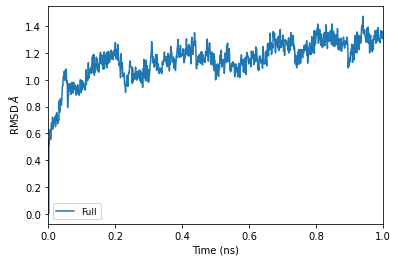

In [22]:
# Lets do time evolution of RMSD
df_rms.plot()
plt.xlim( [0,1])
plt.xlabel('Time (ns)')
plt.ylabel( ' RMSD $\AA$')

plt.legend(ncol=4,fontsize=9,loc=3)
#plt.legend(ncol=4,fontsize=9,loc=3)
plt.savefig('Protein_RMSD.tif')

In [23]:
#Protein RMSF Calculation
c_alphas = u.select_atoms('protein and name CA')
R = rms.RMSF(c_alphas).run()

In [24]:
%matplotlib inline

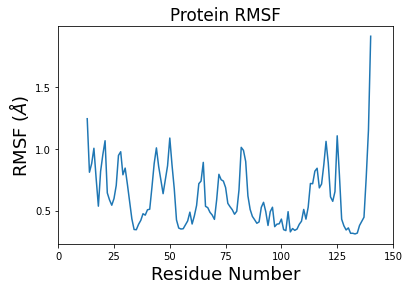

In [25]:
plt.plot(c_alphas.resids, R.rmsf, )
plt.xlim(0,150)
plt.xlabel('Residue Number', fontsize=18)
plt.ylabel('RMSF ($\AA$)', fontsize=18)
mpl.rcParams.update({'font.size': 14})
#plt.legend(loc='lower center')
plt.title('Protein RMSF')
plt.savefig('Protein_RMSF.png')

In [26]:
#PCA Analysis https://userguide.mdanalysis.org/1.0.0/examples/analysis/reduced_dimensions/pca.html 
aligner = align.AlignTraj(u, u, select='backbone', in_memory=True).run() # align the trajectory first

In [27]:
from MDAnalysis.analysis import pca, align
pc = pca.PCA(u, select='backbone', align=False, mean=None, n_components=None).run()

In [28]:
pc.variance[0]

45.7548810239834

In [77]:
print(pc.cumulated_variance[0])
print(pc.cumulated_variance[5])

0.19557399477890555
0.5221738550959852


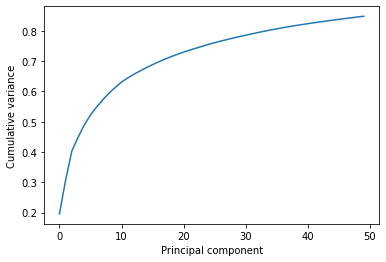

In [79]:
plt.plot(pc.cumulated_variance[:50])
plt.xlabel('Principal component')
plt.ylabel('Cumulative variance');

In [31]:
backbone = u.select_atoms('backbone')
n_bb = len(backbone)
print('There are {} backbone atoms in the analysis'.format(n_bb))
print(pc.p_components.shape)

There are 511 backbone atoms in the analysis
(1533, 1533)


In [32]:
transformed = pc.transform(backbone, n_components=5) # output only 5 PCs
transformed.shape

(1001, 5)

In [33]:
# make a dataframe out of array
import pandas as pd
df = pd.DataFrame(transformed,
                  columns=['PC{}'.format(i+1) for i in range(5)])
df['Time (ps)'] = df.index * u.trajectory.dt
df.head()

,PC1,PC2,PC3,PC4,PC5,Time (ps)
0,-10.870927,5.353275,7.675105,4.035115,-2.580641,0.0
1,-13.313427,3.502795,8.372687,3.874774,-1.767782,1.0
2,-9.872788,6.422288,10.055467,2.618928,-3.433816,2.0
3,-13.070998,4.895748,9.191807,1.794986,-2.477672,3.0
4,-15.321473,4.308055,8.799771,3.072968,-2.646312,4.0


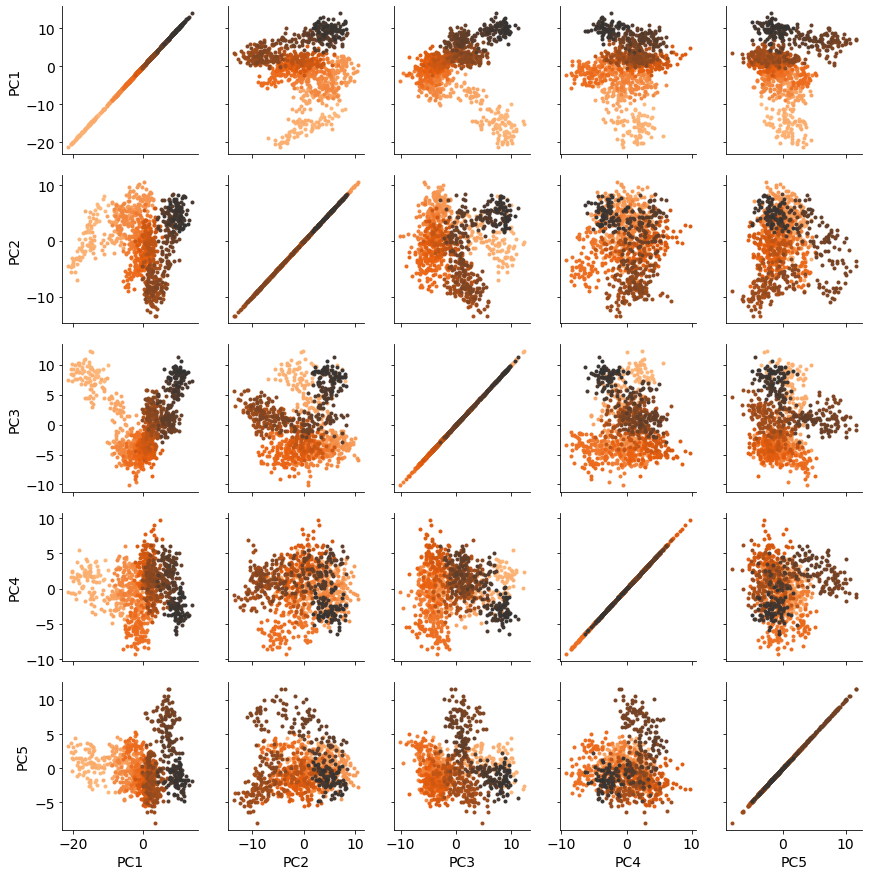

In [34]:
import seaborn as sns

g = sns.PairGrid(df, hue='Time (ps)',
                 palette=sns.color_palette('Oranges_d',
                                           n_colors=len(df)))
g.map(plt.scatter, marker='.')

In [ ]:
#Pairwise RMSD calculation

In [64]:
import MDAnalysis as mda
from MDAnalysis.analysis import diffusionmap, align, rms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
matrix = diffusionmap.DistanceMatrix(u, select='name CA').run()

In [66]:
matrix.dist_matrix.shape

(1001, 1001)

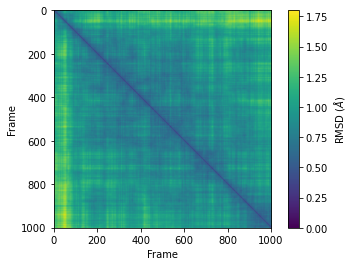

In [67]:
plt.imshow(matrix.dist_matrix, cmap='viridis')
plt.xlabel('Frame')
plt.ylabel('Frame')
plt.colorbar(label=r'RMSD ($\AA$)')

In [ ]:
#Radius of gyration

In [68]:
len(u.trajectory)

1001

In [70]:
for ts in u.trajectory:
    print("Frame: {0:5d}, Time: {1:8.3f} ps".format(ts.frame, u.trajectory.time))
    print("Rgyr: {0:g} A".format(u.atoms.radius_of_gyration()))

Frame:     0, Time:    0.000 ps
Rgyr: 32.1237 A
Frame:     1, Time:    1.000 ps
Rgyr: 32.1252 A
Frame:     2, Time:    2.000 ps
Rgyr: 32.1989 A
Frame:     3, Time:    3.000 ps
Rgyr: 32.1702 A
Frame:     4, Time:    4.000 ps
Rgyr: 32.1928 A
Frame:     5, Time:    5.000 ps
Rgyr: 32.1806 A
Frame:     6, Time:    6.000 ps
Rgyr: 32.1413 A
Frame:     7, Time:    7.000 ps
Rgyr: 32.1344 A
Frame:     8, Time:    8.000 ps
Rgyr: 32.224 A
Frame:     9, Time:    9.000 ps
Rgyr: 32.1652 A
Frame:    10, Time:   10.000 ps
Rgyr: 32.2079 A
Frame:    11, Time:   11.000 ps
Rgyr: 32.2106 A
Frame:    12, Time:   12.000 ps
Rgyr: 32.1319 A
Frame:    13, Time:   13.000 ps
Rgyr: 32.2511 A
Frame:    14, Time:   14.000 ps
Rgyr: 32.2013 A
Frame:    15, Time:   15.000 ps
Rgyr: 32.1972 A
Frame:    16, Time:   16.000 ps
Rgyr: 32.2534 A
Frame:    17, Time:   17.000 ps
Rgyr: 32.1821 A
Frame:    18, Time:   18.000 ps
Rgyr: 32.1312 A
Frame:    19, Time:   19.000 ps
Rgyr: 32.1707 A
Frame:    20, Time:   20.000 ps
Rgyr: 32.

Rgyr: 32.224 A
Frame:   214, Time:  214.000 ps
Rgyr: 32.1327 A
Frame:   215, Time:  215.000 ps
Rgyr: 32.1396 A
Frame:   216, Time:  216.000 ps
Rgyr: 32.2224 A
Frame:   217, Time:  217.000 ps
Rgyr: 32.2132 A
Frame:   218, Time:  218.000 ps
Rgyr: 32.1204 A
Frame:   219, Time:  219.000 ps
Rgyr: 32.2124 A
Frame:   220, Time:  220.000 ps
Rgyr: 32.187 A
Frame:   221, Time:  221.000 ps
Rgyr: 32.179 A
Frame:   222, Time:  222.000 ps
Rgyr: 32.1768 A
Frame:   223, Time:  223.000 ps
Rgyr: 32.2371 A
Frame:   224, Time:  224.000 ps
Rgyr: 32.2529 A
Frame:   225, Time:  225.000 ps
Rgyr: 32.2035 A
Frame:   226, Time:  226.000 ps
Rgyr: 32.1875 A
Frame:   227, Time:  227.000 ps
Rgyr: 32.2075 A
Frame:   228, Time:  228.000 ps
Rgyr: 32.1636 A
Frame:   229, Time:  229.000 ps
Rgyr: 32.1558 A
Frame:   230, Time:  230.000 ps
Rgyr: 32.2488 A
Frame:   231, Time:  231.000 ps
Rgyr: 32.1155 A
Frame:   232, Time:  232.000 ps
Rgyr: 32.1597 A
Frame:   233, Time:  233.000 ps
Rgyr: 32.1181 A
Frame:   234, Time:  234.00

Rgyr: 32.2467 A
Frame:   409, Time:  409.000 ps
Rgyr: 32.2601 A
Frame:   410, Time:  410.000 ps
Rgyr: 32.1863 A
Frame:   411, Time:  411.000 ps
Rgyr: 32.1893 A
Frame:   412, Time:  412.000 ps
Rgyr: 32.2207 A
Frame:   413, Time:  413.000 ps
Rgyr: 32.1752 A
Frame:   414, Time:  414.000 ps
Rgyr: 32.183 A
Frame:   415, Time:  415.000 ps
Rgyr: 32.1904 A
Frame:   416, Time:  416.000 ps
Rgyr: 32.1838 A
Frame:   417, Time:  417.000 ps
Rgyr: 32.1803 A
Frame:   418, Time:  418.000 ps
Rgyr: 32.1583 A
Frame:   419, Time:  419.000 ps
Rgyr: 32.1657 A
Frame:   420, Time:  420.000 ps
Rgyr: 32.1723 A
Frame:   421, Time:  421.000 ps
Rgyr: 32.1669 A
Frame:   422, Time:  422.000 ps
Rgyr: 32.1967 A
Frame:   423, Time:  423.000 ps
Rgyr: 32.1722 A
Frame:   424, Time:  424.000 ps
Rgyr: 32.1667 A
Frame:   425, Time:  425.000 ps
Rgyr: 32.1503 A
Frame:   426, Time:  426.000 ps
Rgyr: 32.1761 A
Frame:   427, Time:  427.000 ps
Rgyr: 32.1653 A
Frame:   428, Time:  428.000 ps
Rgyr: 32.184 A
Frame:   429, Time:  429.0

Rgyr: 32.1757 A
Frame:   623, Time:  623.000 ps
Rgyr: 32.1727 A
Frame:   624, Time:  624.000 ps
Rgyr: 32.229 A
Frame:   625, Time:  625.000 ps
Rgyr: 32.1867 A
Frame:   626, Time:  626.000 ps
Rgyr: 32.1645 A
Frame:   627, Time:  627.000 ps
Rgyr: 32.1837 A
Frame:   628, Time:  628.000 ps
Rgyr: 32.1453 A
Frame:   629, Time:  629.000 ps
Rgyr: 32.2172 A
Frame:   630, Time:  630.000 ps
Rgyr: 32.1705 A
Frame:   631, Time:  631.000 ps
Rgyr: 32.1803 A
Frame:   632, Time:  632.000 ps
Rgyr: 32.1374 A
Frame:   633, Time:  633.000 ps
Rgyr: 32.1224 A
Frame:   634, Time:  634.000 ps
Rgyr: 32.1553 A
Frame:   635, Time:  635.000 ps
Rgyr: 32.1294 A
Frame:   636, Time:  636.000 ps
Rgyr: 32.1864 A
Frame:   637, Time:  637.000 ps
Rgyr: 32.1562 A
Frame:   638, Time:  638.000 ps
Rgyr: 32.2131 A
Frame:   639, Time:  639.000 ps
Rgyr: 32.1543 A
Frame:   640, Time:  640.000 ps
Rgyr: 32.1349 A
Frame:   641, Time:  641.000 ps
Rgyr: 32.1883 A
Frame:   642, Time:  642.000 ps
Rgyr: 32.2183 A
Frame:   643, Time:  643.

Rgyr: 32.1824 A
Frame:   831, Time:  831.000 ps
Rgyr: 32.1789 A
Frame:   832, Time:  832.000 ps
Rgyr: 32.1723 A
Frame:   833, Time:  833.000 ps
Rgyr: 32.2008 A
Frame:   834, Time:  834.000 ps
Rgyr: 32.1994 A
Frame:   835, Time:  835.000 ps
Rgyr: 32.2021 A
Frame:   836, Time:  836.000 ps
Rgyr: 32.1722 A
Frame:   837, Time:  837.000 ps
Rgyr: 32.2705 A
Frame:   838, Time:  838.000 ps
Rgyr: 32.1633 A
Frame:   839, Time:  839.000 ps
Rgyr: 32.1897 A
Frame:   840, Time:  840.000 ps
Rgyr: 32.2547 A
Frame:   841, Time:  841.000 ps
Rgyr: 32.1319 A
Frame:   842, Time:  842.000 ps
Rgyr: 32.1681 A
Frame:   843, Time:  843.000 ps
Rgyr: 32.1844 A
Frame:   844, Time:  844.000 ps
Rgyr: 32.2046 A
Frame:   845, Time:  845.000 ps
Rgyr: 32.1542 A
Frame:   846, Time:  846.000 ps
Rgyr: 32.2032 A
Frame:   847, Time:  847.000 ps
Rgyr: 32.2097 A
Frame:   848, Time:  848.000 ps
Rgyr: 32.2139 A
Frame:   849, Time:  849.000 ps
Rgyr: 32.219 A
Frame:   850, Time:  850.000 ps
Rgyr: 32.233 A
Frame:   851, Time:  851.0

In [71]:
Rgyr = []
protein = u.select_atoms("protein")
for ts in u.trajectory:
   Rgyr.append((u.trajectory.time, protein.radius_of_gyration()))
Rgyr = np.array(Rgyr)

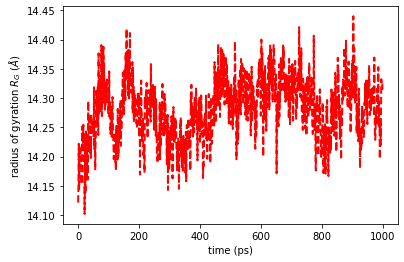

In [72]:
#Plot
import matplotlib.pyplot as plt
ax = plt.subplot(111)
ax.plot(Rgyr[:,0], Rgyr[:,1], 'r--', lw=2, label=r"$R_G$")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"radius of gyration $R_G$ ($\AA$)")
ax.figure.savefig("Rgyr.pdf")
plt.draw()